In [0]:
%matplotlib notebook
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from maze import *
from evaluation import *

In [0]:
def greedy(Q, df, learn_rate, Epsilon, env):
    dcnt = 0.9

    for states in range (112):        
        greedy = np.random.rand()
        if greedy > Epsilon:
            action = np.argmax(Q[states, :])
        else:
            action = np.random.randint(4)
        reward, next_state, done = env.step(states, action)
        Q[states, action] = learn_rate * (reward + df * np.max(Q[next_state,:])) + (1-learn_rate) * Q[states, action] 
    return Q

In [0]:
maze = Maze()
ACTMAP = {0:3, 1:2, 2:0, 3:1}
Q_vals = np.zeros((112, 4))
actions = np.zeros(112)
df = 0.9
LR = 0.7 # Learning rate
E = 0.2 # hyperparameter epsilon
g = 0.9 # gamma
env.slip = 0

In [0]:
# Iterate through 5000 iterations of policy improvement
Q_table = np.load('Q_Table.npy')
Q_new = np.zeros((States,Actions))

RMSE = np.zeros(Steps)
for i in range(5000):
    Q_new = greedy(Q_new, g, LR, E, maze)
    RMSE[i] = np.sqrt(np.mean((Q_table - Q_new)**2))
for s in range (112):
    actions[s] = np.argmax(Q_vals[s,:])

print("Q:")
print(Q_vals)
print("Policy:")
print(actions)

Q:
[[ 5.64859073  6.27621192  5.64859073  5.64859073]
 [ 6.9735688   7.74840978  6.9735688   6.9735688 ]
 [ 8.6093442   9.565938    8.6093442   8.6093442 ]
 [ 8.6093442   9.565938    8.6093442   8.6093442 ]
 [10.62882    11.8098     10.62882    10.62882   ]
 [10.62882    11.8098     10.62882    10.62882   ]
 [12.9140163  14.348907   12.9140163  12.9140163 ]
 [15.94323    17.7147     15.94323    15.94323   ]
 [ 5.64859073  6.27621192  6.27621192  6.9735688 ]
 [ 6.9735688   7.74840978  7.74840978  8.6093442 ]
 [ 8.6093442   9.565938    9.565938   10.62882   ]
 [ 8.6093442   9.565938    9.565938   10.62882   ]
 [10.62882    11.8098     11.8098     13.122     ]
 [10.62882    11.8098     11.8098     13.122     ]
 [12.9140163  14.348907   14.348907   15.94323   ]
 [15.94323    17.7147     17.7147     19.683     ]
 [ 6.9735688   7.74840978  7.74840978  6.9735688 ]
 [10.4603532  11.62261467 11.62261467 10.4603532 ]
 [ 7.74840978  7.74840978  7.74840978  8.6093442 ]
 [10.4603532  11.62261467 11

2.135044280285081


<IPython.core.display.Javascript object>


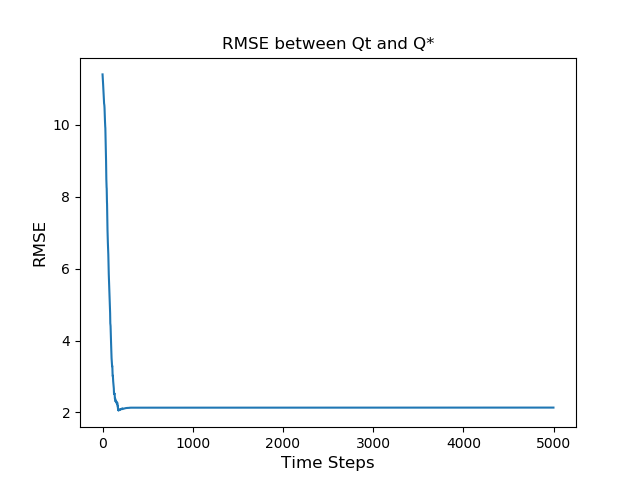

Text(0, 0.5, 'RMSE')

In [0]:
print(RMSE[-1])
fig = plt.figure()
plt.plot(RMSE)
plt.title('RMSE between Qt and Q*', fontsize=12)
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('RMSE', fontsize=12)

In [0]:
Q_vals = np.zeros((112,4))
action = np.zeros(112)

# 100 * 50 = 5000 iterations
eval_steps, eval_reward = [], []
for i in range(100):
    for j in range(50):
        Q_vals = Q_Learning(Q_vals, env, g, LR, E)   
    avg_step, avg_reward = evaluation(env, Q_vals)
    eval_steps.append(avg_step)
    eval_reward.append(avg_reward)

<IPython.core.display.Javascript object>


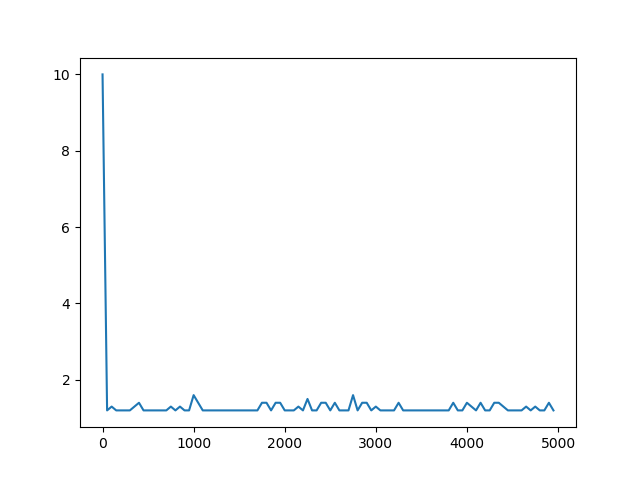

<IPython.core.display.Javascript object>


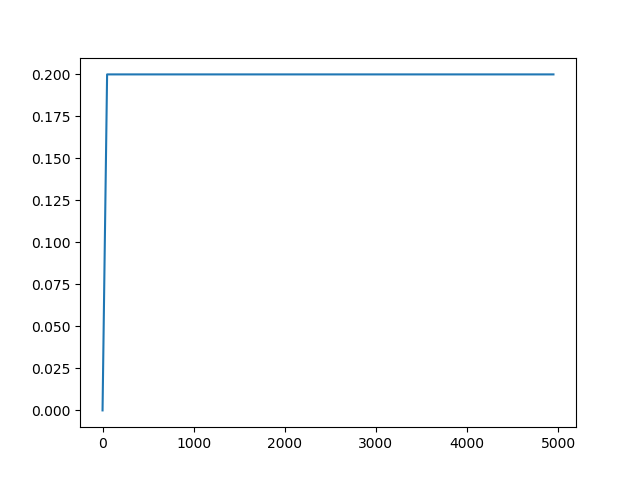

In [0]:
f1, ax1 = plt.subplots()
ax1.plot(np.arange(0,5000,50), eval_steps)
f2, ax2 = plt.subplots()
ax2.plot(np.arange(0,5000,50), eval_reward)